# 1.Dependencies and setup

In [4]:
!pip install tensorflow opencv-python matplotlib

In [5]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.1.0
aext-assistant-server             4.1.0
aext-core                         4.1.0
aext-core-server                  4.1.0
aext-panels                       4.1.0
aext-panels-server                4.1.0
aext-project-filebrowser-server   4.1.0
aext-share-notebook               4.1.0
aext-share-notebook-server        4.1.0
aext-shared                       4.1.0
aext-toolbox                      4.1.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-cli-base    

In [8]:
import tensorflow as tf
import os
from matplotlib import  pyplot as plt

In [10]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
tf.config.list_physical_devices('GPU')

[]

# 2. Removel of Currupt and Unsuitable Data

In [15]:
import cv2
import imghdr

C:\Users\tp200\AppData\Local\Temp\ipykernel_21976\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [17]:
data_dir = 'data' 

In [19]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [21]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\after\.ipynb_checkpoints
Issue with image data\before\.ipynb_checkpoints


# 3. Load Data

In [184]:
import numpy as np
from matplotlib import pyplot as plt

In [186]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 890 files belonging to 2 classes.


In [188]:
data_iterator = data.as_numpy_iterator()

In [190]:
batch = data_iterator.next()

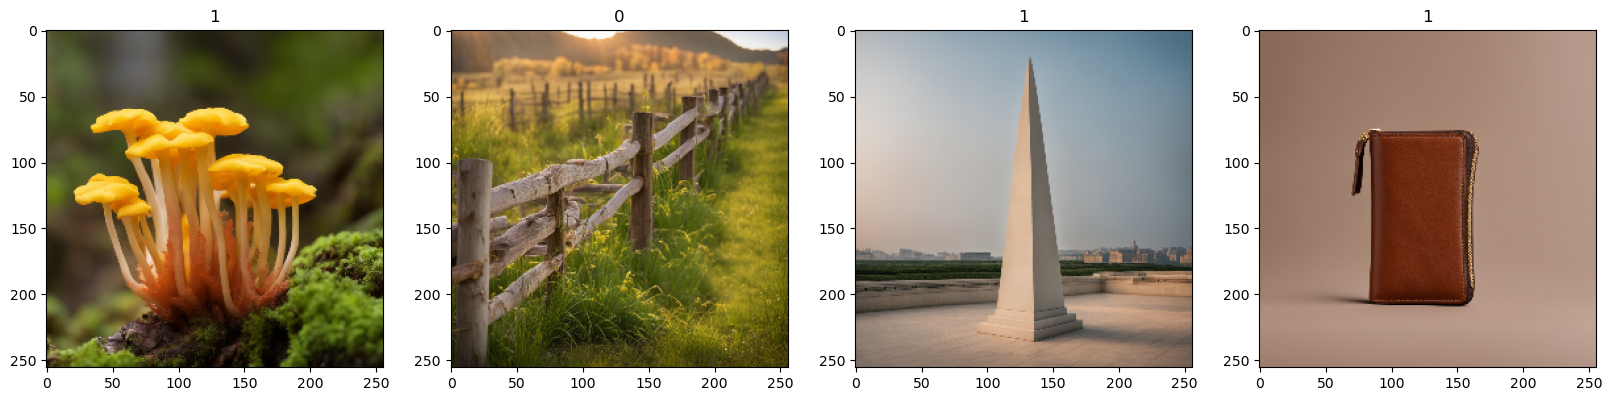

In [192]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    #before is 1, after is 0

# 4. Scale Data

In [195]:
data = data.map(lambda x,y: (x/255, y))

In [197]:
data.as_numpy_iterator().next()

(array([[[[0.6313726 , 0.6333333 , 0.627451  ],
          [0.627451  , 0.63039213, 0.62352943],
          [0.62647057, 0.6284314 , 0.622549  ],
          ...,
          [0.6245098 , 0.6245098 , 0.6156863 ],
          [0.6254902 , 0.6254902 , 0.61764705],
          [0.6254902 , 0.62647057, 0.6156863 ]],
 
         [[0.63039213, 0.63235295, 0.62647057],
          [0.63235295, 0.6333333 , 0.627451  ],
          [0.63039213, 0.6343137 , 0.62647057],
          ...,
          [0.62352943, 0.6254902 , 0.6156863 ],
          [0.62647057, 0.627451  , 0.61764705],
          [0.627451  , 0.62941176, 0.61960787]],
 
         [[0.63235295, 0.63529414, 0.63039213],
          [0.6284314 , 0.63039213, 0.6245098 ],
          [0.6284314 , 0.6313726 , 0.6245098 ],
          ...,
          [0.627451  , 0.62941176, 0.61960787],
          [0.6245098 , 0.6284314 , 0.6166667 ],
          [0.627451  , 0.6284314 , 0.61960787]],
 
         ...,
 
         [[0.60784316, 0.6117647 , 0.6019608 ],
          [0.60980

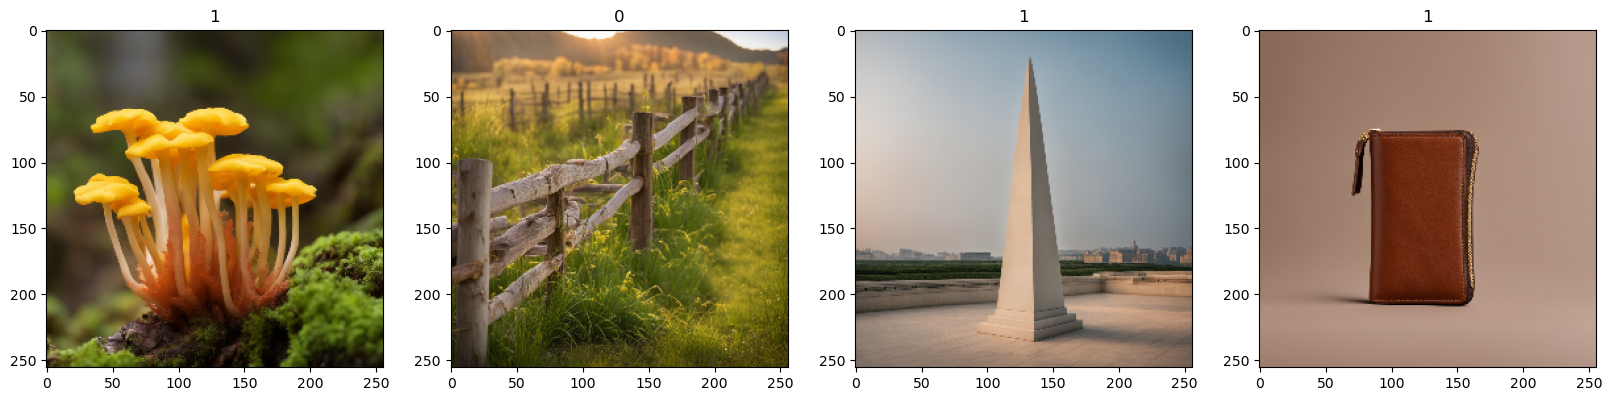

In [199]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [202]:
len(data)

28

In [204]:
train_size = int(len(data)*.7)+2
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [206]:
train_size+val_size+test_size

28

In [208]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [210]:
len(test)

2

# 6. CNN Deep Learning Model

In [293]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [295]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [297]:
model = Sequential()

In [299]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [301]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [303]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [306]:
logdir='logs'

In [308]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [310]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 338ms/step - accuracy: 0.5021 - loss: 1.2490 - val_accuracy: 0.5125 - val_loss: 0.6920
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 329ms/step - accuracy: 0.4670 - loss: 0.6953 - val_accuracy: 0.5188 - val_loss: 0.6929
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - accuracy: 0.5084 - loss: 0.6930 - val_accuracy: 0.4750 - val_loss: 0.6928
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 334ms/step - accuracy: 0.5192 - loss: 0.6916 - val_accuracy: 0.5125 - val_loss: 0.6905
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 322ms/step - accuracy: 0.5253 - loss: 0.6915 - val_accuracy: 0.5375 - val_loss: 0.6911
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - accuracy: 0.6021 - loss: 0.6895 - val_accuracy: 0.5125 - val_loss: 0.7823
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.4904 - loss: 0.7281 - val_accuracy: 0.4625 - val_loss: 0.6987
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 325ms/step - accuracy: 0.5205 - loss: 0.6905 - val_accuracy: 0.

# 8. Plot Performance

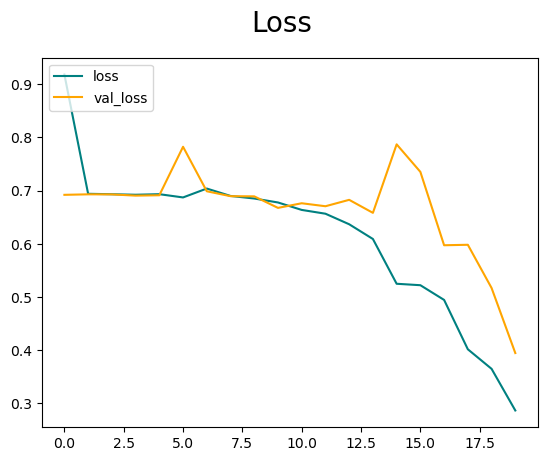

In [315]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

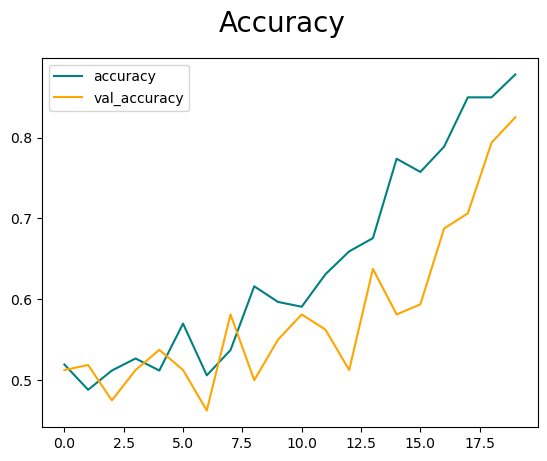

In [317]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [319]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [321]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [323]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [324]:
print(f'Precesion:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precesion:0.8055555820465088, Recall:0.9354838728904724, Accuracy:0.8448275923728943


# 10. Test

In [328]:
import cv2

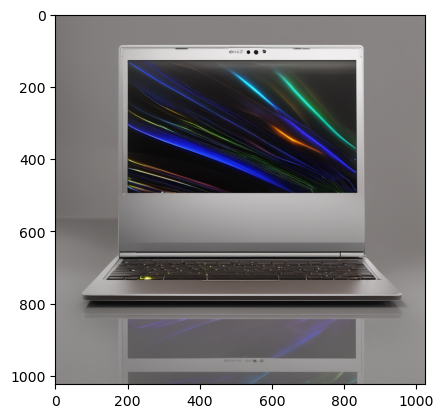

In [330]:
img = cv2.imread('v3_1568_before.png')
plt.imshow(img)
plt.show()

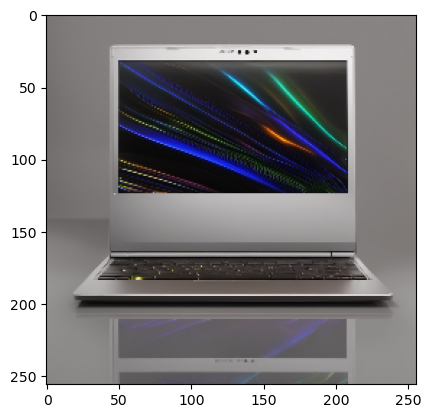

In [332]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [334]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [336]:
yhat

array([[0.9432439]], dtype=float32)

In [338]:
if yhat > 0.5: 
    print(f'Predicted class is before')
else:
    print(f'Predicted class is after')

Predicted class is before


# 11. Save the Model

In [301]:
from tensorflow.keras.models import load_model

In [303]:
model.save(os.path.join('models','SDRmodel.h5'))

In [305]:
new_model = load_model(os.path.join('models','SDRmodel.h5'))

In [307]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0.9996818]], dtype=float32)

# 12. Show differences

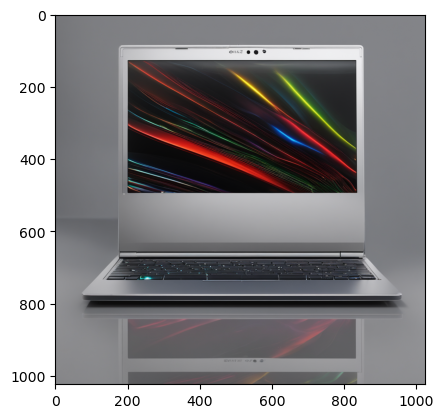

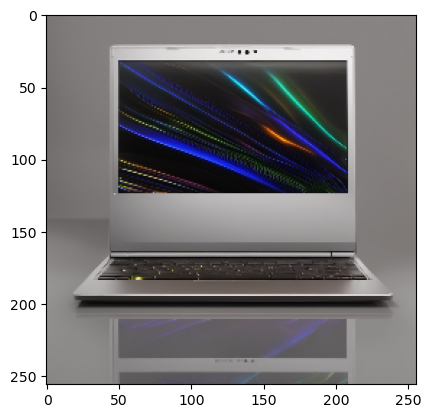

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class is before

Attributes for Before Image:
color: The notebook computer in Image 1 is slightly brighter compared to Image 2.
texture: The notebook computer in Image 1 is more glossy than in Image 2.
color: The notebook computer in Image 1 is slightly brighter compared to Image 2.
texture: The notebook computer in Image 1 is more glossy than in Image 2.

Attributes for After Image:
shape: The notebook computer screen display in image 1 is larger than in image 2.
shape: The notebook computer screen in image 1 is larger than in image 2.


In [342]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the pre-trained model from H5 file
model_path = os.path.join('models', 'SDRmodel.h5')
model = tf.keras.models.load_model(model_path)

# Load the image
image_name = 'v3_1568_before.png'  # Change this to any image name
img = cv2.imread(image_name)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Resize the image
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Predict the class
yhat = model.predict(np.expand_dims(resize / 255, 0))

# Determine the predicted class
predicted_class = 'before' if yhat > 0.5 else 'after'
print(f'Predicted class is {predicted_class}')

# Load the annotation file
with open('class_train_annotation.json', 'r') as file:
    annotations = json.load(file)

# Find and separate differences in the annotation file for the given image
image_base_name = image_name.rsplit('_', 1)[0]  # Extract base name from the image name

before_attributes = []
after_attributes = []

for annotation in annotations:
    for content in annotation['contents']:
        if image_base_name in content['name'] and content['name'].endswith(predicted_class):
            for attribute in annotation['attributes']:
                question = attribute['question'].rsplit(' Which is image 1: After or Before?', 1)[0]
                if attribute['answer'].lower() == 'before':
                    before_attributes.append(f"{attribute['key']}: {question}")
                elif attribute['answer'].lower() == 'after':
                    after_attributes.append(f"{attribute['key']}: {question}")
            break

# Print the attributes
print("\nAttributes for Before Image:")
for attribute in before_attributes:
    print(attribute)

print("\nAttributes for After Image:")
for attribute in after_attributes:
    print(attribute)


In [ ]:
-